In [1]:
import warnings
warnings.filterwarnings("ignore")

# data manipulation
import pandas as pd

# data visualisation
import plotly.express as px
import seaborn as sns
%matplotlib inline                 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace(" ","_")
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [4]:
display(df.head(5))
display(df.shape)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


(541909, 8)

# Data Cleaning

In [5]:
# Missing data Evaluation

missing_data=pd.DataFrame({
    #'col name':df.columns,
    "missing numer":df.isnull().sum(),
    "missing percent": round(df.isnull().mean()*100,4)
})
missing_data

,missing numer,missing percent
invoiceno,0,0.0000
stockcode,0,0.0000
description,1454,0.2683
quantity,0,0.0000
invoicedate,0,0.0000
unitprice,0,0.0000
customerid,135080,24.9267
country,0,0.0000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.shape

(541909, 8)

In [8]:
df.isnull().mean()*100

invoiceno       0.000000
stockcode       0.000000
description     0.268311
quantity        0.000000
invoicedate     0.000000
unitprice       0.000000
customerid     24.926694
country         0.000000
dtype: float64

In [9]:
df['customerid'].nunique()

4372

In [10]:
df['description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [11]:
df['invoiceno'].nunique()

25900

In [12]:
df.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [13]:
df[df['description'].isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
df.dropna(axis = 0, how = 'any', subset = 'description', inplace = True)

In [15]:
df.isnull().sum()

invoiceno           0
stockcode           0
description         0
quantity            0
invoicedate         0
unitprice           0
customerid     133626
country             0
dtype: int64

In [16]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
display(df.columns)
display(df.info())

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    540455 non-null  object        
 1   stockcode    540455 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     540455 non-null  int64         
 4   invoicedate  540455 non-null  datetime64[ns]
 5   unitprice    540455 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


None

In [18]:
df['invoiceno'].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [19]:
df['customerid'].fillna(value=df['invoiceno'].astype(str) + '_missing', inplace=True)

 the missing 'customerid' values are filled with a unique identifier created by combining the 'invoiceno' values with the string '_missing'. You can customize this identifier based on your specific needs. The key is to ensure that the identifier is unique for each missing 'customerid' value.

 Remember to replace 'df' with the actual name of your DataFrame. This approach ensures that you fill missing values with distinct identifiers for each case while preserving the uniqueness of 'customerid'.

In [20]:
df.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [21]:
df[['quantity', 'unitprice']].corr()

,quantity,unitprice
quantity,1.000000,-0.001248
unitprice,-0.001248,1.000000


In [22]:
df.shape

(540455, 8)

In [23]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Data Exploration
Explore the Amazon product reviews dataset to understand the structure and content of reviews.

In [24]:

# # Display basic statistics of the dataset
# print("\nBasic statistics of the dataset:")
# print(df.describe())

# # Check for missing values
# print("\nMissing values in the dataset:")
# print(df.isnull().sum())

# # Display the number of unique values in each column
# print("\nNumber of unique values in each column:")
# print(df.nunique())

# # Display the data types of each column
# print("\nData types of each column:")
# print(df.dtypes)



**This code provides a comprehensive overview of the dataset, including the first few rows, basic statistics, missing values, unique values, data types, distribution of ratings (if available), review length statistics, and a sample of reviews.**

In [25]:
df.head(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    540455 non-null  object        
 1   stockcode    540455 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     540455 non-null  int64         
 4   invoicedate  540455 non-null  datetime64[ns]
 5   unitprice    540455 non-null  float64       
 6   customerid   540455 non-null  object        
 7   country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.1+ MB


In [27]:
#df[['quantity', 'unitprice', 'description_encoded', 'country_encoded']].corr()

In [28]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [30]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [31]:
pip install category_encoders


  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 330.3 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/81.9 kB 469.7 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 572.9 kB/s eta 0:00:00


# Feature encoding

In [32]:
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()
df['description_encoded'] = target_encoder.fit_transform(df['description'], df['unitprice'])
target_encoder_country = TargetEncoder()
df['country_encoded'] = target_encoder_country.fit_transform(df['country'], df['unitprice'])

# View the encoded countries
print(df[['country', 'country_encoded']].head())
# View the encoded descriptions
print(df[['description', 'description_encoded']].head())

          country  country_encoded
0  United Kingdom         4.545762
1  United Kingdom         4.545762
2  United Kingdom         4.545762
3  United Kingdom         4.545762
4  United Kingdom         4.545762
                           description  description_encoded
0   WHITE HANGING HEART T-LIGHT HOLDER             3.204251
1                  WHITE METAL LANTERN             4.627866
2       CREAM CUPID HEARTS COAT HANGER             4.298532
3  KNITTED UNION FLAG HOT WATER BOTTLE             5.187484
4       RED WOOLLY HOTTIE WHITE HEART.             5.102071


# Interpretation
Country Encoding:

The 'country' column is encoded using target encoding, and the result is stored in the new column 'country_encoded.'
For example, the first five rows show the original 'country' values as 'United Kingdom,' and the corresponding encoded values are approximately 4.546.
Description Encoding:

Similarly, the 'description' column is encoded using target encoding, and the result is stored in the new column 'description_encoded.'
The first five rows display the original 'description' values along with their corresponding encoded values.
Interpretation:

Target encoding is applied to capture the relationship between categorical features and the target variable, 'unitprice,' by encoding each category based on the mean of the target variable for that category.
The encoded values provide a numerical representation of the categorical features, which can be used as input features for machine learning models.

In [33]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,description_encoded,country_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3.204251,4.545762
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.627866,4.545762
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4.298532,4.545762
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5.187484,4.545762
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5.102071,4.545762
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1.006767,5.028864
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2.430906,5.028864
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,4.264853,5.028864
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,4.342099,5.028864


# Model Building using Regression


In [34]:
X = df[['quantity', 'description_encoded','country_encoded']]
y = df['unitprice']

# Interpretation
X: This creates a feature matrix (X) by selecting three columns from the DataFrame 'df': 'quantity', 'description_encoded', and 'country_encoded'. These are the features used to predict the target variable.

y: This creates a target variable (y) by selecting the 'unitprice' column from the DataFrame 'df'. The goal is to predict the unit price based on the specified features.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 0.80, random_state= 121)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [37]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("r2:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MSE):", mse)

Mean Squared Error (MSE): 2105.0146186657344
r2: 0.5876865359254804
Mean Absolute Error (MSE): 2105.0146186657344


# Interpretation

The output metrics provide information on the performance of the linear regression model. Here's an interpretation of each metric:

Mean Squared Error (MSE): 2105.0146

The MSE is a measure of the average squared difference between the predicted and actual values.
In this context, a MSE of 2105.0146 means, on average, the squared difference between the predicted and actual 'unitprice' values in the test set is approximately 2105.0146. Lower MSE values indicate better model performance.
R-squared (r2): 0.5877

R-squared is a measure of how well the model explains the variance in the target variable.
An r2 value of 0.5877 indicates that approximately 58.77% of the variance in 'unitprice' is explained by the model. Higher r2 values suggest better explanatory power.
Mean Absolute Error (MAE): 2105.0146

MAE is the average absolute difference between the predicted and actual values.
In this context, a MAE of 2105.0146 means, on average, the absolute difference between the predicted and actual 'unitprice' values in the test set is approximately 2105.0146. Lower MAE values indicate better model performance.
In summary, the model's performance is moderate, with the R-squared indicating that the model explains a substantial portion of the variance in 'unitprice.' However, the Mean Squared Error and Mean Absolute Error values suggest that there is room for improvement, and the model may benefit from further refinement or feature engineering.

# Clustering 1

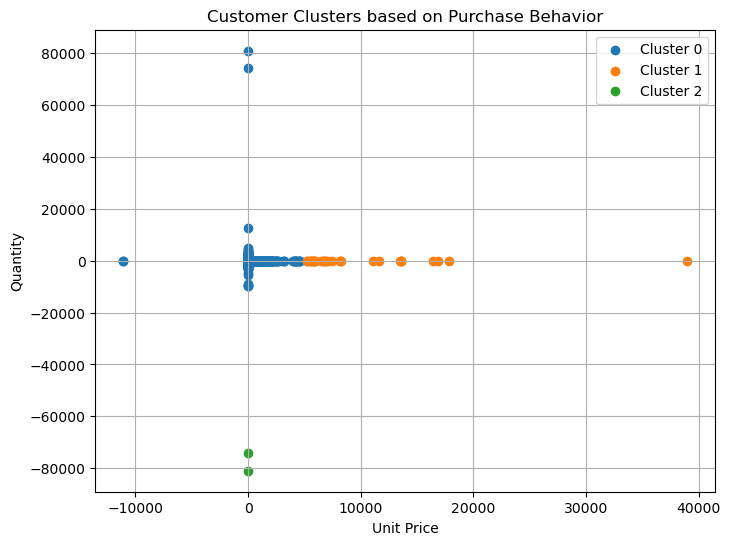

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df[['unitprice', 'quantity']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use K-means clustering with, for example, 3 clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster_label in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['unitprice'], cluster_data['quantity'], label=f'Cluster {cluster_label}')

plt.title('Customer Clusters based on Purchase Behavior')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation:

Data Preparation:

The code selects two features, 'unitprice' and 'quantity', from the DataFrame 'df'.
Missing values in the selected features are imputed using the mean value.
Feature Scaling:

The features are then scaled using StandardScaler to ensure that they have similar scales. This step is crucial for K-means clustering.
K-Means Clustering:

K-means clustering is applied with the specified number of clusters (num_clusters = 3). The algorithm groups data points into clusters based on their similarity.
Visualization:

The clusters are visualized in a 2D scatter plot. Each point represents a data point in the 'unitprice' vs. 'quantity' feature space.
Different clusters are color-coded, and each point is labeled with the cluster it belongs to.
Interpretation of the Graph:

The graph displays clusters formed by the K-means algorithm based on the features 'unitprice' and 'quantity'.
Points that are close to each other in the plot are considered similar in terms of these features.
Interpretation of the clusters involves understanding the characteristics of customers within each cluster. For example, clusters might represent different purchasing patterns or behaviors based on unit price and quantity.

# Clustering 2

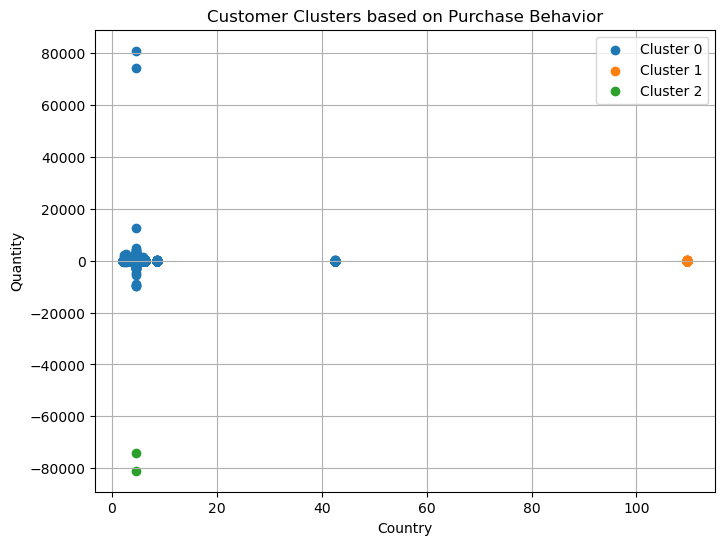

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df[['country_encoded', 'quantity']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use K-means clustering with, for example, 3 clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster_label in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['country_encoded'], cluster_data['quantity'], label=f'Cluster {cluster_label}')

plt.title('Customer Clusters based on Purchase Behavior')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation:

Data Preparation:

The code selects two features, 'country_encoded' and 'quantity', from the DataFrame 'df'.
Missing values in the selected features are imputed using the mean value.
Feature Scaling:

The features are then scaled using StandardScaler to ensure that they have similar scales. This step is crucial for K-means clustering.
K-Means Clustering:

K-means clustering is applied with the specified number of clusters (num_clusters = 3). The algorithm groups data points into clusters based on their similarity.
Visualization:

The clusters are visualized in a 2D scatter plot. Each point represents a data point in the 'country_encoded' vs. 'quantity' feature space.
Different clusters are color-coded, and each point is labeled with the cluster it belongs to.
Interpretation of the Graph:

The graph displays clusters formed by the K-means algorithm based on the features 'country_encoded' and 'quantity'.
Points that are close to each other in the plot are considered similar in terms of these features.
Interpretation of the clusters involves understanding the characteristics of customers within each cluster. For example, clusters might represent different purchasing patterns or behaviors in different countries.

# Clustering 3

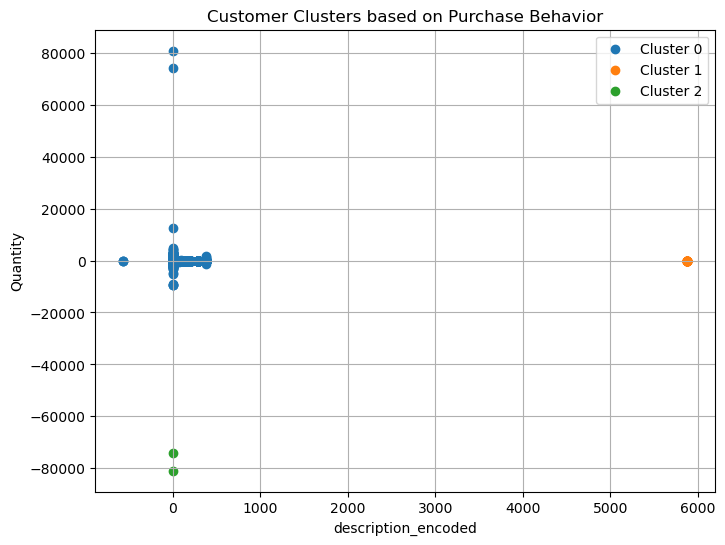

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df[['description_encoded', 'quantity']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use K-means clustering with, for example, 3 clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster_label in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['description_encoded'], cluster_data['quantity'], label=f'Cluster {cluster_label}')

plt.title('Customer Clusters based on Purchase Behavior')
plt.xlabel('description_encoded')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation:

Data Preparation:

The code selects two features, 'description_encoded' and 'quantity', from the DataFrame 'df'.
Missing values in the selected features are imputed using the mean value.
Feature Scaling:

The features are then scaled using StandardScaler to ensure that they have similar scales. This step is crucial for K-means clustering.
K-Means Clustering:

K-means clustering is applied with the specified number of clusters (num_clusters = 3). The algorithm groups data points into clusters based on their similarity.
Visualization:

The clusters are visualized in a 2D scatter plot. Each point represents a data point in the 'description_encoded' vs. 'quantity' feature space.
Different clusters are color-coded, and each point is labeled with the cluster it belongs to.
Interpretation of the Graph:

The graph displays clusters formed by the K-means algorithm based on the features 'description_encoded' and 'quantity'.
Points that are close to each other in the plot are considered similar in terms of these features.
Interpretation of the clusters involves understanding the characteristics of customers within each cluster. For example, clusters might represent different purchasing patterns or behaviors.

In [41]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,description_encoded,country_encoded,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3.204251,4.545762,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.627866,4.545762,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4.298532,4.545762,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5.187484,4.545762,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5.102071,4.545762,0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1.006767,5.028864,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2.430906,5.028864,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,4.264853,5.028864,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,4.342099,5.028864,0


# Standardize or normalize numerical features for better model performance.

In [42]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'description_encoded',
       'country_encoded', 'cluster'],
      dtype='object')

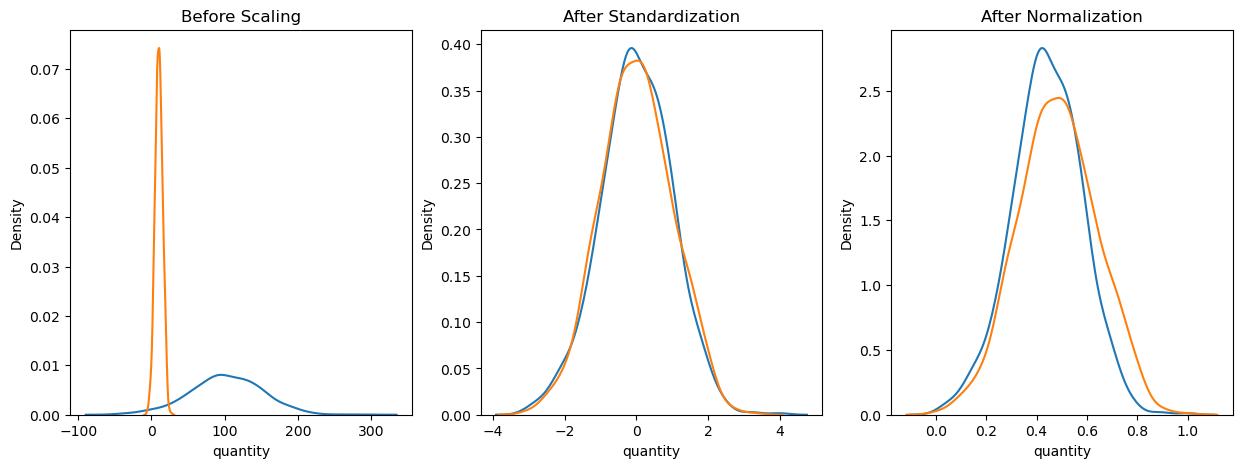

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a sample dataset (replace this with your actual dataset)
np.random.seed(1)
df = pd.DataFrame({
    'quantity': np.random.normal(100, 50, 1000),
    'unitprice': np.random.normal(10, 5, 1000),
})

# Use StandardScaler for Standardization
scaler_standard = StandardScaler()
df_standardized = scaler_standard.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=['quantity', 'unitprice'])

# Use MinMaxScaler for Normalization
scaler_minmax = MinMaxScaler()
df_normalized = scaler_minmax.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=['quantity', 'unitprice'])

# Plot and visualize the results
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

# Before Standardization/Normalization
ax1.set_title('Before Scaling')
sns.kdeplot(df['quantity'], ax=ax1, label='quantity')
sns.kdeplot(df['unitprice'], ax=ax1, label='unitprice')

# After Standardization
ax2.set_title('After Standardization')
sns.kdeplot(df_standardized['quantity'], ax=ax2, label='quantity')
sns.kdeplot(df_standardized['unitprice'], ax=ax2, label='unitprice')

# After Normalization
ax3.set_title('After Normalization')
sns.kdeplot(df_normalized['quantity'], ax=ax3, label='quantity')
sns.kdeplot(df_normalized['unitprice'], ax=ax3, label='unitprice')

plt.show()


# Interpretation of code
Sample Dataset Creation:

A synthetic dataset is created with two numerical features, 'quantity' and 'unitprice,' each containing 1000 random values.
Standardization (Z-score normalization):

The StandardScaler is applied to standardize the numerical features. Standardization transforms the data so that it has a mean of 0 and a standard deviation of 1.
The standardized data is stored in df_standardized.
Normalization (Min-Max scaling):

The MinMaxScaler is applied to normalize the numerical features. Normalization scales the data to a specific range, typically [0, 1].
The normalized data is stored in df_normalized.
Visualization:

A subplot with three columns is created to visualize the distribution of the features before and after standardization and normalization.
The first subplot displays the original distribution of 'quantity' and 'unitprice.'
The second subplot shows the distribution after standardization, and the third subplot shows the distribution after normalization.
Interpretation of Plots:

Before Scaling: The original distribution of 'quantity' and 'unitprice.'
After Standardization: The distributions of 'quantity' and 'unitprice' after applying standardization, where both features now have a mean of 0 and a standard deviation of 1.
After Normalization: The distributions of 'quantity' and 'unitprice' after applying normalization, where both features are scaled to the [0, 1] range.